In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [92]:
file_path = "/Users/janmak/Documents/Development/Statistics/spam.data"  
data = pd.read_csv(file_path, sep=' ', header=0)
data.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [93]:
training_data = data.iloc[:1000]
testing_data = data.iloc[1000:]

In [94]:
train_features = training_data.iloc[:, :-1]  
train_target = training_data.iloc[:, -1] 

In [95]:
test_features = testing_data.iloc[:, :-1]    
test_target = testing_data.iloc[:, -1]

In [96]:
# Initialize and train Random Forest
RF_clf = RandomForestClassifier(random_state=42)
RF_clf.fit(train_features, train_target)

RandomForestClassifier(random_state=42)

In [97]:
#Initialize and train Decision Tree
DT_clf = DecisionTreeClassifier(random_state=42)
DT_clf.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [98]:
# Make predictions on the test set Random Forest + Decision Tree
RF_test_predictions = RF_clf.predict(test_features)
DT_test_predictions = DT_clf.predict(test_features)

In [99]:
# Calculate overall accuracy of Random Forest
overall_accuracy = accuracy_score(test_target, RF_test_predictions)
print("Overall Accuracy Random Forest:", overall_accuracy)

Overall Accuracy Random Forest: 0.9352957511802277


In [100]:
# Calculate overall accuracy of Decision Tree
overall_accuracy = accuracy_score(test_target, DT_test_predictions)
print("Overall Accuracy Decision Tree:", overall_accuracy)

Overall Accuracy Decision Tree: 0.8894751457928354


In [101]:
# Generate the confusion matrix for Random Forest
conf_matrix = confusion_matrix(test_target, RF_test_predictions)
print("Confusion Matrix Random Forest:\n", conf_matrix)

Confusion Matrix Random Forest:
 [[2103   79]
 [ 154 1265]]


In [102]:
# Generate the confusion matrix for Decision Tree
conf_matrix = confusion_matrix(test_target, DT_test_predictions)
print("Confusion Matrix Decision Tree:\n", conf_matrix)

Confusion Matrix Decision Tree:
 [[1979  203]
 [ 195 1224]]


In [103]:
# Generate classification report to get per-class accuracy, precision, recall, and F1 score for Random Forest
class_report = classification_report(test_target, RF_test_predictions, target_names=["ham", "spam"])
print("Classification Report Random Forest:\n", class_report)

Classification Report Random Forest:
               precision    recall  f1-score   support

         ham       0.93      0.96      0.95      2182
        spam       0.94      0.89      0.92      1419

    accuracy                           0.94      3601
   macro avg       0.94      0.93      0.93      3601
weighted avg       0.94      0.94      0.93      3601



In [104]:
# Generate the confusion matrix for Decision Tree
class_report = classification_report(test_target, DT_test_predictions, target_names=["ham", "spam"])
print("Classification Report Decision Tree:\n", class_report)

Classification Report Decision Tree:
               precision    recall  f1-score   support

         ham       0.91      0.91      0.91      2182
        spam       0.86      0.86      0.86      1419

    accuracy                           0.89      3601
   macro avg       0.88      0.88      0.88      3601
weighted avg       0.89      0.89      0.89      3601



In [105]:
n_estimators_list = [50, 500, 5000]
train_sizes = [1000, 500]
max_features_list = ['sqrt']

In [106]:
# Loop through different configurations for Random Forest
for n_estimators in n_estimators_list:
    for train_size in train_sizes:
        for max_features in max_features_list:
            train_features_subset = train_features[:train_size]
            train_target_subset = train_target[:train_size]
            
            RF_clf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=42)
            RF_clf.fit(train_features_subset, train_target_subset)
            
            RF_test_predictions = RF_clf.predict(test_features)
            
            overall_accuracy_rf = accuracy_score(test_target, RF_test_predictions)
            print(f"Random Forest | Estimators: {n_estimators}, Train Size: {train_size}, Max Features: {max_features}")
            print("Overall Accuracy Random Forest:", overall_accuracy_rf)
            
            conf_matrix_rf = confusion_matrix(test_target, RF_test_predictions)
            print("Confusion Matrix Random Forest:\n", conf_matrix_rf)
            
            class_report_rf = classification_report(test_target, RF_test_predictions, target_names=["ham", "spam"])
            print("Classification Report Random Forest:\n", class_report_rf)


Random Forest | Estimators: 50, Train Size: 1000, Max Features: sqrt
Overall Accuracy Random Forest: 0.9339072479866704
Confusion Matrix Random Forest:
 [[2100   82]
 [ 156 1263]]
Classification Report Random Forest:
               precision    recall  f1-score   support

         ham       0.93      0.96      0.95      2182
        spam       0.94      0.89      0.91      1419

    accuracy                           0.93      3601
   macro avg       0.93      0.93      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Random Forest | Estimators: 50, Train Size: 500, Max Features: sqrt
Overall Accuracy Random Forest: 0.9180783115801167
Confusion Matrix Random Forest:
 [[2075  107]
 [ 188 1231]]
Classification Report Random Forest:
               precision    recall  f1-score   support

         ham       0.92      0.95      0.93      2182
        spam       0.92      0.87      0.89      1419

    accuracy                           0.92      3601
   macro avg       0

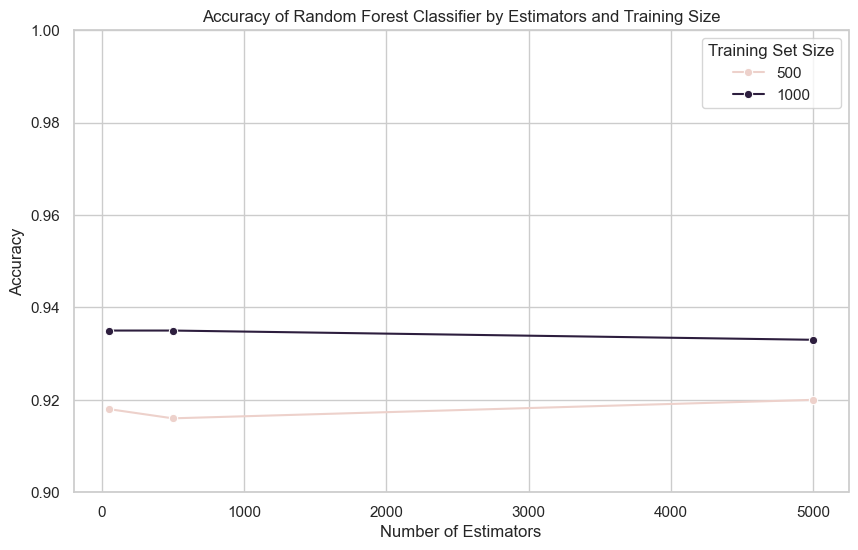

In [107]:
# Plot of accuracy for estimators, train size and accuracy
results = {
    'Estimators': [50, 50, 500, 500, 5000, 5000],
    'Train_Size': [1000, 500, 1000, 500, 1000, 500],
    'Accuracy': [0.935, 0.918, 0.935, 0.916, 0.933, 0.920]
}

df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Estimators', y='Accuracy', hue='Train_Size', marker='o')
plt.title('Accuracy of Random Forest Classifier by Estimators and Training Size')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(title='Training Set Size')
plt.ylim(0.9, 1.0)
plt.grid(True)
plt.show()


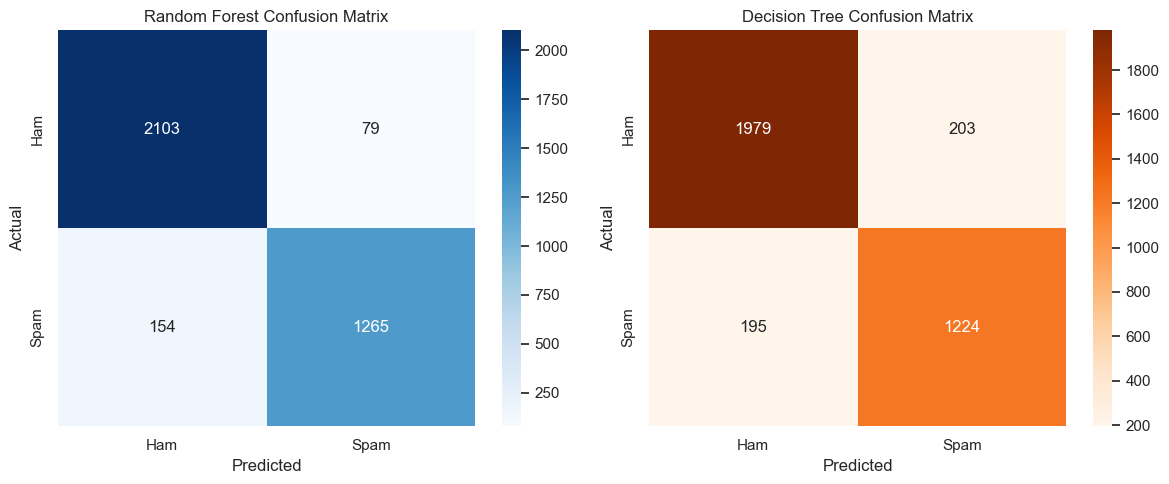

In [108]:
#Random forest vs Decision tree confusion matrix
rf_conf_matrix = np.array([[2103, 79], [154, 1265]])
dt_conf_matrix = np.array([[1979, 203], [195, 1224]])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_xticklabels(["Ham", "Spam"])
ax[0].set_yticklabels(["Ham", "Spam"])

sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Decision Tree Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")
ax[1].set_xticklabels(["Ham", "Spam"])
ax[1].set_yticklabels(["Ham", "Spam"])

plt.tight_layout()
plt.show()


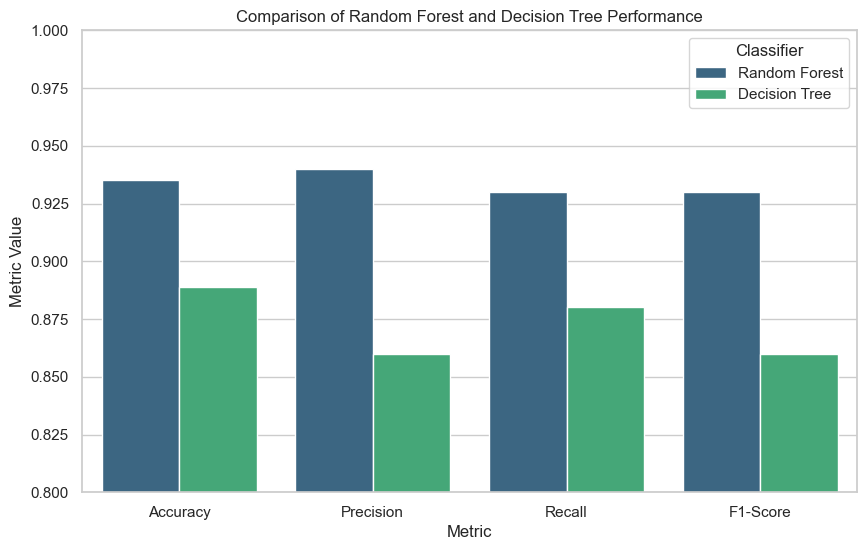

In [109]:
# Random Forest vs Decision Tree Plot
metrics = {
    'Classifier': ['Random Forest', 'Random Forest', 'Random Forest', 'Random Forest', 
                   'Decision Tree', 'Decision Tree', 'Decision Tree', 'Decision Tree'],
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 
               'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [0.935, 0.94, 0.93, 0.93,  
              0.889, 0.86, 0.88, 0.86]   
}

df_metrics = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_metrics, x='Metric', y='Value', hue='Classifier', palette='viridis')

plt.title('Comparison of Random Forest and Decision Tree Performance')
plt.ylabel('Metric Value')
plt.ylim(0.8, 1.0)  

plt.show()


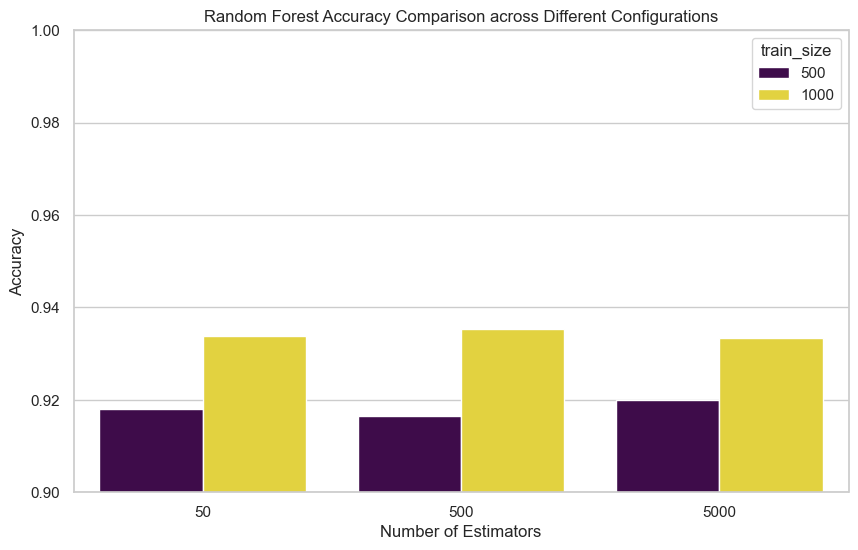

In [110]:
#Bar graph comparing random forest models.
data_rf = {
    'Model': ['Random Forest'] * 6,
    'n_estimators': [50, 50, 500, 500, 5000, 5000],
    'train_size': [1000, 500, 1000, 500, 1000, 500],
    'accuracy': [0.9339, 0.9181, 0.9353, 0.9164, 0.9334, 0.9200]
}

df_rf = pd.DataFrame(data_rf)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_rf, x='n_estimators', y='accuracy', hue='train_size', palette='viridis')

plt.title('Random Forest Accuracy Comparison across Different Configurations')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)

plt.show()
